In [1]:
"""
Import
"""
from matplotlib.colors import ListedColormap, BoundaryNorm, TwoSlopeNorm, LinearSegmentedColormap, LogNorm
import matplotlib.cm as cm
import matplotlib.lines as mlines
from typing import List, Dict

import numpy as np
import pandas as pd
import xarray as xr

import pickle
import os
import glob
import sys
from datetime import datetime, timedelta
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy.ma as ma
import cartopy.crs as ccrs  # Import cartopy ccrs
import cartopy.feature as cfeature  # Import cartopy common features
from matplotlib import animation
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import scipy.stats
import math
import time as time_mod

sys.path.insert(0, "/home/chalifour/code/master")
from fct_script.func_py import get_proj_extent
import fct_script.rpn_funcs_chris as rpn_chris
from fct_script.get_domain import get_domain_info
from fct_script.func_py import get_colormap_precip, categorical_cmap
from matplotlib.patches import Patch
from Annual_analysis.fct_diff_map import get_cmap, biais, get_data_stat


# from func_py import get_proj_extent


try:
    import rpnpy.librmn.all as rmn  # Module to read RPN files
    from rotated_lat_lon import RotatedLatLon  # Module to project field on native grid (created by Sasha Huziy)
except ImportError as err:
    print(f"RPNPY can only be use on the server. It can't be use on a personal computer."
          f"\nError throw :{err}")

In [2]:
begin_1, end_1 = '2020-10', '2021-04'
begin_2, end_2 = '2021-10', '2022-04'
begin_date_1, end_date_1 = datetime.strptime(begin_1, '%Y-%m'), datetime.strptime(end_1, '%Y-%m')
begin_date_2, end_date_2 = datetime.strptime(begin_2, '%Y-%m'), datetime.strptime(end_2, '%Y-%m')
#

begin_t, end_t = '2020-10', '2022-04'
# timerange_month = pd.date_range(begin, end, freq='MS')
#
# timerange_day = pd.date_range(begin, end, freq='D')

# season = ['ON', 'DJF', 'MAM']
# season_dict = {'ON': {'month': [10, 11], 'year': begin_date.year},
#                'DJF': {'month': [12, 1, 2], 'year': begin_date.year},
#                'MAM': {'month': [3, 4, 5], 'year': end_date.year}}
list_phase = ['LIQUID', 'FR', 'MIXFR', 'MIX', 'SOLID', 'PR']
phase_list = ['frac_liquide', 'frac_FZ', 'frac_mix_fr', 'frac_mix', 'frac_solide', 'PR']


In [3]:
lonlat_path = '/upslope/chalifour/code_fig_bassin_domaine/Disdrometres_coordonnées.csv'
df_disdro = pd.read_csv(lonlat_path, header=0)
df_disdro.set_index('Name', inplace=True)
data_path = sorted(glob.glob(fr"/upslope/chalifour/projet_maitrise/"))[0]
HQ_compiled_savepath = os.path.join(data_path, r"data_format-master/Data.nosync/station_gmon/Full_datasets")
file_1h = glob.glob(HQ_compiled_savepath + '/dataset_1h.csv')

path_save_df = '/upslope/chalifour/projet_maitrise/dataframe_obs_formated'

In [4]:
phase_list = ['PR','TT']
resample_dict = {}
resample_dict_capa = {}
for ph in phase_list:

    if ph == 'TT':
        resample_dict[ph] = 'mean'
    else:
        resample_dict[ph] = 'sum'
        resample_dict_capa[ph] = 'sum'


In [5]:
temp_while_prcp = False

path_save_df = '/upslope/chalifour/projet_maitrise/dataframe_obs_formated'

list_stat_prob = ['ARGENT', 'BAUBERT', 'BETSIA_M', 'CONRAD', 'DIAMAND', 'GAREMANG', 'HARTJ_G', 'LACROI_G', 'LAVAL', 'MOUCHA_M', 'NOIRS', 'PARENT_G', 'PIPMUA_G', 'ROMA_SE', 'SM3CAM_G', 'STMARG_G', 'WABISTAN']
# Obs
dataframe_1h_obs = pd.read_csv(path_save_df + f'/dataframe_1h_stat_formated_2year.csv',
                               parse_dates=['date'])
# dataframe_1h_obs_1 = pd.read_csv(path_save_df + f'/dataframe_1h_stat_formated_2020_2021.csv',
#                                parse_dates=['date'])
# dataframe_1h_obs_2 = pd.read_csv(path_save_df + f'/dataframe_1h_stat_formated_2021_2022.csv',
#                                parse_dates=['date'])

dataframe_1h_obs.set_index('date', inplace=True)

dict_obs = {'frac_liquid': 'frac_liquide', 'precip_inst_pluvio': 'PR','temp_moy':'TT'}
# call rename () method
dataframe_1h_obs.rename(columns=dict_obs,
                        inplace=True)



# dataframe_11km_obs = pd.read_csv(path_save_df + f'/dataframe_11km_stat_formated_2year.csv',
#                                  parse_dates=['time'])
# dataframe_11km_obs.set_index('time', inplace=True)
f'/upslope/chalifour/projet_maitrise/dataframe_obs_formated/dataframe_11km_stat_formated_2year.csv'
dataframe_11kmP3_obs = pd.read_csv(
    path_save_df + f'/dataframe_11kmP3_stat_formated_2year.csv',
    parse_dates=['time'])
dataframe_11kmP3_obs.set_index('time', inplace=True)


# dataframe_2p5km_obs = pd.read_csv(
#     path_save_df + f'/dataframe_2p5kmP3_obs_formated_2year.csv', parse_dates=['time'])
# dataframe_2p5km_obs.set_index('time', inplace=True)

dataframe_2p5kmP3_obs = pd.read_csv(
    path_save_df + f'/dataframe_2p5kmP3_stat_formated_2year.csv', parse_dates=['time'])
dataframe_2p5kmP3_obs.set_index('time', inplace=True)



dataframe_era5_obs_1 = pd.read_csv(path_save_df + f'/dataframe_ERA5-land_stat_formated_2020_2021.csv',
                                   parse_dates=['time'])
dataframe_era5_obs_2 = pd.read_csv(path_save_df + f'/dataframe_ERA5-land_stat_formated_2021_2022.csv',
                                   parse_dates=['time'])

dataframe_era5_obs = pd.concat([dataframe_era5_obs_1, dataframe_era5_obs_2])
dataframe_era5_obs.set_index('time', inplace=True)





dataframe_1h_obs_capa = pd.read_csv(
    f'/upslope/chalifour/projet_maitrise/data_sim_station/closest_point/dataset_stat_sim_capa_2020-09_2022-06.csv',
    parse_dates=['time'])
dataframe_1h_obs_capa.set_index('time', inplace=True)


dataframe_day_obs = pd.read_csv(
    path_save_df + f'/dataframe_daymet_stat_formated_2year.csv',
    parse_dates=['time'])
dataframe_day_obs.set_index('time', inplace=True)

dict_obs_day = {'prcp': 'PR', 'tavg': 'TT'}
dataframe_day_obs.rename(columns=dict_obs_day,
                        inplace=True)
# if temp_while_prcp:
#     dataframe_day_obs = dataframe_day_obs[dataframe_day_obs['PR']>=0.2]
# missing_date = (pd.date_range(start = begin_t, end = end_t )+pd.Timedelta('12h')).difference(dataframe_daymet_obs_d.index)
list_era5 = []
list_11kmP3 = []
list_2p5kmP3 = []
list_obs = []
list_capa = []
# list_capa_obs=[]
list_daymet_obs=[]

var_lookat = 'PR'
for stat, subdf in dataframe_1h_obs.groupby('filename'):
    if stat not in list_stat_prob:


        if temp_while_prcp:
            dataframe_11kmP3_obs = dataframe_11kmP3_obs[mask_prcp_obs]

        if temp_while_prcp:
            dataframe_2p5kmP3_obs = dataframe_2p5kmP3_obs[mask_prcp_obs]
        if temp_while_prcp:
            dataframe_era5_obs = dataframe_era5_obs[mask_prcp_obs]


        subdf = subdf.loc[begin_t:end_t]
        if temp_while_prcp:
            mask_prcp_obs=subdf['PR']>=0.2
            subdf = subdf[mask_prcp_obs]
        # subdf_c = subdf.copy(deep=True)
        # subdf.index = subdf.index - pd.Timedelta('1h')

        # subdf = subdf_c.reindex(subdf.index,fill_value=0)
        # subdf.loc[subdf['PR'] <= 0.1,['PR']]=0
        subdf_d = subdf.resample('1D',label='right').agg(resample_dict)
        subdf_tmin = subdf['TT'].resample('1D',label='right').min()
        subdf_tmax = subdf['TT'].resample('1D',label='right').max()
        subdf_d['TT']= (subdf_tmin+subdf_tmax)/2
        # list_obs.append(np.sum(subdf_d[var_lookat]))
        list_obs.append(subdf_d)
        # begin_t,end_t = '2020-10-01','2020-10-05'
        subdf_capa = dataframe_1h_obs_capa.loc[dataframe_1h_obs_capa['filename'] == stat]
        subdf_capa = subdf_capa.loc[begin_t:end_t]
        subdf_capa_d = subdf_capa.resample('1D',label='right').agg(resample_dict_capa)

        # list_capa.append(np.sum(subdf_capa_d[var_lookat]))
        list_capa.append(subdf_capa_d)





        # subdf_obs_6h = subdf.resample('1D',label='right').agg(resample_dict_capa)
        # list_capa_obs.append(subdf_obs_6h)



        subdf_11kmP3_obs = dataframe_11kmP3_obs.loc[dataframe_11kmP3_obs['filename'] == stat]
        subdf_11kmP3_obs = subdf_11kmP3_obs.loc[begin_t:end_t]
        if temp_while_prcp:
            subdf_11kmP3_obs = subdf_11kmP3_obs[mask_prcp_obs]
        # subdf_11kmP3_obs.loc[subdf_11kmP3_obs['PR'] <= 0.5,['PR']]=0
        subdf_11kmP3_obs_d = subdf_11kmP3_obs.resample('1D',label='right').agg(resample_dict)
        subdf_11kmP3_obs_tmin = subdf_11kmP3_obs['TT'].resample('1D',label='right').min()
        subdf_11kmP3_obs_tmax = subdf_11kmP3_obs['TT'].resample('1D',label='right').max()
        subdf_11kmP3_obs_d['TT']= (subdf_11kmP3_obs_tmin+subdf_11kmP3_obs_tmax)/2

        # list_11kmP3.append(np.sum(subdf_11kmP3_obs_d[var_lookat]))
        list_11kmP3.append(subdf_11kmP3_obs_d)

        subdf_2p5kmP3_obs = dataframe_2p5kmP3_obs.loc[dataframe_2p5kmP3_obs['filename'] == stat]
        subdf_2p5kmP3_obs = subdf_2p5kmP3_obs.loc[begin_t:end_t]
        # subdf_2p5kmP3_obs.loc[subdf_2p5kmP3_obs['PR'] <= 0.5,['PR']]=0
        if temp_while_prcp:
            subdf_2p5kmP3_obs = subdf_2p5kmP3_obs[mask_prcp_obs]
        subdf_2p5kmP3_obs_d = subdf_2p5kmP3_obs.resample('1D',label='right').agg(resample_dict)
        subdf_2p5kmP3_obs_tmin = subdf_2p5kmP3_obs['TT'].resample('1D',label='right').min()
        subdf_2p5kmP3_obs_tmax = subdf_2p5kmP3_obs['TT'].resample('1D',label='right').max()
        subdf_2p5kmP3_obs_d['TT']= (subdf_2p5kmP3_obs_tmin+subdf_2p5kmP3_obs_tmax)/2
        # list_2p5kmP3.append(np.sum(subdf_2p5kmP3_obs_d[var_lookat]))
        list_2p5kmP3.append(subdf_2p5kmP3_obs_d)




        subdf_era5_obs = dataframe_era5_obs.loc[dataframe_era5_obs['filename'] == stat]
        subdf_era5_obs = subdf_era5_obs.loc[begin_t:end_t]
        if temp_while_prcp:
            subdf_era5_obs = subdf_era5_obs[mask_prcp_obs]

        subdf_era5_obs_d = subdf_era5_obs.resample('1D',label='right').agg(resample_dict)
        subdf_era5_obs_tmin = subdf_era5_obs['TT'].resample('1D',label='right').min()
        subdf_era5_obs_tmax = subdf_era5_obs['TT'].resample('1D',label='right').max()
        subdf_era5_obs_d['TT']= (subdf_era5_obs_tmin+subdf_era5_obs_tmax)/2

        # list_era5.append(np.sum(subdf_era5_obs_d[var_lookat]))
        list_era5.append(subdf_era5_obs_d)

        subdf_daymet_obs = dataframe_day_obs.loc[dataframe_day_obs['filename'] == stat]
        subdf_daymet_obs = subdf_daymet_obs.loc[begin_t:end_t]
        subdf_daymet_obs.index = subdf_daymet_obs.index + pd.Timedelta('12h')
        subdf_daymet_obs = subdf_daymet_obs.reindex(subdf_d.index, fill_value=np.nan)
        # list_daymet_obs.append(np.sum(subdf_daymet_obs[var_lookat]))
        list_daymet_obs.append(subdf_daymet_obs)
        # fig = plt.figure(figsize=(5, 5),dpi=200)
        # plt.scatter(subdf.index,subdf['PR']/subdf['PR']*1,label='0h')
        # subdf_2 = subdf.copy()
        # subdf_2.index = subdf_2.index + pd.Timedelta('1h')
        # #
        # subdf_2 = subdf_2.reindex(subdf.index,fill_value=0)
        # subdf_3 = subdf.copy()
        # subdf_3.index = subdf_3.index - pd.Timedelta('1h')
        # #
        # #
        # subdf_3 = subdf_3.reindex(subdf.index,fill_value=0)
        # plt.scatter(subdf_2.index,subdf_2['PR']/subdf_2['PR']*1.1,label='+1h')
        # plt.scatter(subdf_3.index,subdf_3['PR']/subdf_3['PR']*0.9,label='-1h')
        # plt.scatter(subdf_11kmP3_obs.index,subdf_11kmP3_obs['PR']/subdf_11kmP3_obs['PR']*1.5,label = '11 km')
        # plt.scatter(subdf_2p5kmP3_obs.index,subdf_2p5kmP3_obs['PR']/subdf_2p5kmP3_obs['PR']*0.5,label = '2.5 km' )
        # plt.scatter(subdf_era5_obs.index,subdf_era5_obs['PR']/subdf_era5_obs['PR']*1.25,label = 'ERA5 km' )

        # print(f'\n{stat}')
        # print('\n11 km - obs +0h',np.corrcoef(np.nan_to_num(subdf['PR']),np.nan_to_num(subdf_11kmP3_obs['PR']))[0,1])
        # print('11 km - obs +1h',np.corrcoef(np.nan_to_num(subdf_2['PR']),np.nan_to_num(subdf_11kmP3_obs['PR']))[0,1])
        # print('11 km - obs -1h',np.corrcoef(np.nan_to_num(subdf_3['PR']),np.nan_to_num(subdf_11kmP3_obs['PR']))[0,1])
        # print('\n2.5 km - obs +0h',np.corrcoef(np.nan_to_num(subdf['PR']),np.nan_to_num(subdf_2p5kmP3_obs['PR']))[0,1])
        # print('2.5 km - obs +1h',np.corrcoef(np.nan_to_num(subdf_2['PR']),np.nan_to_num(subdf_2p5kmP3_obs['PR']))[0,1])
        # print('2.5 km - obs -1h',np.corrcoef(np.nan_to_num(subdf_3['PR']),np.nan_to_num(subdf_2p5kmP3_obs['PR']))[0,1])
        #
        # print('\nERA5 km - obs +0h',np.corrcoef(np.nan_to_num(subdf['PR']/subdf['PR']),np.nan_to_num(subdf_era5_obs['PR']/subdf_era5_obs['PR']))[0,1])
        # print('ERA5 km - obs +1h',np.corrcoef(np.nan_to_num(subdf_2['PR']/subdf_2['PR']),np.nan_to_num(subdf_era5_obs['PR']/subdf_era5_obs['PR']))[0,1])
        # print('ERA5 km - obs -1h',np.corrcoef(np.nan_to_num(subdf_3['PR']/subdf_3['PR']),np.nan_to_num(subdf_era5_obs['PR']/subdf_era5_obs['PR']))[0,1])
        # plt.grid(True)
        # plt.legend()
        # plt.show()
        # plt.close(fig)


dataframe_1h_obs_d = pd.concat(list_obs)
dataframe_11kmP3_obs_d = pd.concat(list_11kmP3)
dataframe_2p5kmP3_obs_d = pd.concat(list_2p5kmP3)
dataframe_era5_obs_d = pd.concat(list_era5)
dataframe_capa_obs_d = pd.concat(list_capa)
dataframe_daymet_obs_d = pd.concat(list_daymet_obs)
# #




# uqam
dataframe_1h_uqam = pd.read_csv(path_save_df + f'/dataframe_uqam_formated_2year.csv',
                                parse_dates=['date'])
dataframe_1h_uqam.set_index('date', inplace=True)
dataframe_1h_uqam.rename(columns=dict_obs,
                         inplace=True)

dataframe_1h_uqam = dataframe_1h_uqam.loc[begin_t:end_t]
if temp_while_prcp:
    mask_pr_uqam = dataframe_1h_uqam['PR']>=0.2
    dataframe_1h_uqam = dataframe_1h_uqam[mask_pr_uqam]

dataframe_1h_uqam_d = dataframe_1h_uqam.resample('1D',label='right').agg(resample_dict)
dataframe_1h_uqam_tmin = dataframe_1h_uqam['TT'].resample('1D',label='right').min()
dataframe_1h_uqam_tmax = dataframe_1h_uqam['TT'].resample('1D',label='right').max()
dataframe_1h_uqam_d['TT']= (dataframe_1h_uqam_tmin+dataframe_1h_uqam_tmax)/2
list_obs.append(np.sum(dataframe_1h_uqam_d['PR']))

dataframe_11kmP3_uqammomo = pd.read_csv(
    path_save_df + f'/dataframe_11kmP3_Umomo_stat_formated_2year.csv', parse_dates=['time'])
dataframe_11kmP3_uqammomo.set_index('time', inplace=True)


# dataframe_2p5km_uqammomo = pd.read_csv(
#     path_save_df + f'/dataframe_2p5km_Umomo_stat_formated_{begin_date.year}_{end_date.year}.csv', parse_dates=['time'])
# dataframe_2p5km_uqammomo.set_index('time', inplace=True)

dataframe_2p5kmP3_uqammomo = pd.read_csv(
    path_save_df + f'/dataframe_2p5kmP3_Umomo_stat_formated_2year.csv', parse_dates=['time'])
dataframe_2p5kmP3_uqammomo.set_index('time', inplace=True)


dataframe_uqammomo_capa = pd.read_csv(
    f'/upslope/chalifour/projet_maitrise/data_sim_station/closest_point/dataset_UQAM_MOMO_capa_2020-09_2022-06.csv',
    parse_dates=['time'])

dataframe_uqammomo_capa.set_index('time', inplace=True)

# dataframe_uqammomo_capa_d = dataframe_uqammomo_capa.resample('1D',label='right').agg(resample_dict)

dataframe_uqammomo_day = pd.read_csv(
    path_save_df + f'/dataframe_daymet_uqammomo_formated_2year.csv',
    parse_dates=['time'])

dataframe_uqammomo_day.set_index('time', inplace=True)
dataframe_uqammomo_day.rename(columns=dict_obs_day,
                        inplace=True)
if temp_while_prcp:
    dataframe_uqammomo_day= dataframe_uqammomo_day[dataframe_uqammomo_day['PR']>=0.2]

dataframe_era5_uqammomo_1 = pd.read_csv(path_save_df + f'/dataframe_ERA5-land_uqammomo_formated_2020_2021.csv',
                                        parse_dates=['time'])
dataframe_era5_uqammomo_2 = pd.read_csv(path_save_df + f'/dataframe_ERA5-land_uqammomo_formated_2021_2022.csv',
                                        parse_dates=['time'])

dataframe_era5_uqammomo = pd.concat([dataframe_era5_uqammomo_1, dataframe_era5_uqammomo_2])
dataframe_era5_uqammomo.set_index('time', inplace=True)

if temp_while_prcp:
    dataframe_era5_uqammomo= dataframe_era5_uqammomo[dataframe_era5_uqammomo['PR']>=0.2]


# dataframe_era5_uqammomo.rename(columns=dict_ph,
#                                inplace=True)
# dataframe_11kmuqam = dataframe_11km_uqammomo.loc[dataframe_11km_uqammomo['filename'] == 'UQAM_PK']
# dataframe_11kmuqam = dataframe_11kmuqam.loc[begin:end]
# dataframe_2p5kmuqam = dataframe_2p5km_uqammomo.loc[dataframe_2p5km_uqammomo['filename'] == 'UQAM_PK']
# dataframe_2p5kmuqam=dataframe_2p5kmuqam.loc[begin:end]
dataframe_11kmP3uqam = dataframe_11kmP3_uqammomo.loc[dataframe_11kmP3_uqammomo['filename'] == 'UQAM_PK']
dataframe_11kmP3uqam = dataframe_11kmP3uqam.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_11kmP3uqam = dataframe_11kmP3uqam[mask_pr_uqam]
dataframe_11kmP3uqam_d = dataframe_11kmP3uqam.resample('1D',label='right').agg(resample_dict)
dataframe_11kmP3uqam_tmin = dataframe_11kmP3uqam['TT'].resample('1D',label='right').min()
dataframe_11kmP3uqam_tmax = dataframe_11kmP3uqam['TT'].resample('1D',label='right').max()
dataframe_11kmP3uqam_d['TT']= (dataframe_11kmP3uqam_tmin+dataframe_11kmP3uqam_tmax)/2

list_11kmP3.append(np.sum(dataframe_11kmP3uqam_d[var_lookat]))



dataframe_2p5kmP3uqam = dataframe_2p5kmP3_uqammomo.loc[dataframe_2p5kmP3_uqammomo['filename'] == 'UQAM_PK']
dataframe_2p5kmP3uqam = dataframe_2p5kmP3uqam.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_2p5kmP3uqam  = dataframe_2p5kmP3uqam[mask_pr_uqam]
dataframe_2p5kmP3uqam_d = dataframe_2p5kmP3uqam.resample('1D',label='right').agg(resample_dict)
dataframe_2p5kmP3uqam_tmin = dataframe_2p5kmP3uqam['TT'].resample('1D',label='right').min()
dataframe_2p5kmP3uqam_tmax = dataframe_2p5kmP3uqam['TT'].resample('1D',label='right').max()
dataframe_2p5kmP3uqam_d['TT']= (dataframe_2p5kmP3uqam_tmin+dataframe_2p5kmP3uqam_tmax)/2
list_2p5kmP3.append(np.sum(dataframe_2p5kmP3uqam_d[var_lookat]))
dataframe_era5uqam = dataframe_era5_uqammomo.loc[dataframe_era5_uqammomo['filename'] == 'UQAM_PK']
dataframe_era5uqam = dataframe_era5uqam.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_era5uqam   = dataframe_era5uqam [mask_pr_uqam]
dataframe_era5uqam_d = dataframe_era5uqam.resample('1D',label='right').agg(resample_dict)
dataframe_era5uqam_tmin = dataframe_era5uqam['TT'].resample('1D',label='right').min()
dataframe_era5uqam_tmax = dataframe_era5uqam['TT'].resample('1D',label='right').max()
dataframe_era5uqam_d['TT']= (dataframe_era5uqam_tmin+dataframe_era5uqam_tmax)/2
list_era5.append(np.sum(dataframe_era5uqam_d[var_lookat]))

dataframe_capauqam = dataframe_uqammomo_capa.loc[dataframe_uqammomo_capa['filename'] == 'UQAM_PK']
dataframe_capauqam = dataframe_capauqam.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_capauqam   = dataframe_capauqam[mask_pr_uqam]
dataframe_capauqam = dataframe_capauqam[~dataframe_capauqam.index.duplicated(keep='first')]
dataframe_capauqam_d = dataframe_capauqam.resample('1D',label='right').agg(resample_dict_capa)
list_capa.append(np.sum(dataframe_capauqam_d[var_lookat]))
dataframe_daymetuqam = dataframe_uqammomo_day.loc[dataframe_uqammomo_day['filename'] == 'UQAM_PK']
dataframe_daymetuqam = dataframe_daymetuqam.loc[begin_t:end_t]

dataframe_daymetuqam.index = dataframe_daymetuqam.index + pd.Timedelta('12h')
dataframe_daymetuqam = dataframe_daymetuqam.reindex(dataframe_1h_uqam_d.index, fill_value=np.nan)
list_daymet_obs.append(np.sum(dataframe_daymetuqam[var_lookat]))


# momo

dataframe_1h_momo = pd.read_csv(path_save_df + f'/dataframe_momo_formated_2year.csv',
                                parse_dates=['date'])
dataframe_1h_momo.set_index('date', inplace=True)
dict_obs = {'frac_liquid': 'frac_liquide', 'precip_inst_geonor': 'PR','temp_moy':'TT'}
dataframe_1h_momo.rename(columns=dict_obs,
                         inplace=True)
dataframe_1h_momo = dataframe_1h_momo.loc[begin_t:end_t]

if temp_while_prcp:
    mask_pr_momo = dataframe_1h_momo['PR']>=0.2
    dataframe_1h_momo= dataframe_1h_momo[mask_pr_momo]

dataframe_1h_momo_d = dataframe_1h_momo.resample('1D',label='right').agg(resample_dict)
dataframe_1h_momo_tmin = dataframe_1h_momo['TT'].resample('1D',label='right').min()
dataframe_1h_momo_tmax = dataframe_1h_momo['TT'].resample('1D',label='right').max()
dataframe_1h_momo_d['TT']= (dataframe_1h_momo_tmin+dataframe_1h_momo_tmax)/2

list_obs.append(np.sum(dataframe_1h_momo_d['PR']))

# dataframe_6h_momo = dataframe_1h_momo['PR'].resample('6H').sum()

# dataframe_11kmmomo = dataframe_11km_uqammomo.loc[dataframe_11km_uqammomo['filename'] == 'NEIGE']
# dataframe_11kmmomo = dataframe_11kmmomo.loc[begin:end]
# dataframe_2p5kmmomo = dataframe_2p5km_uqammomo.loc[dataframe_2p5km_uqammomo['filename'] == 'NEIGE']
# dataframe_2p5kmmomo =dataframe_2p5kmmomo.loc[begin:end]
dataframe_11kmP3momo = dataframe_11kmP3_uqammomo.loc[dataframe_11kmP3_uqammomo['filename'] == 'NEIGE']
dataframe_11kmP3momo = dataframe_11kmP3momo.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_11kmP3momo   = dataframe_11kmP3momo[mask_pr_momo]
dataframe_11kmP3momo_d = dataframe_11kmP3momo.resample('1D',label='right').agg(resample_dict)
dataframe_11kmP3momo_tmin = dataframe_11kmP3momo['TT'].resample('1D',label='right').min()
dataframe_11kmP3momo_tmax = dataframe_11kmP3momo['TT'].resample('1D',label='right').max()
dataframe_11kmP3momo_d['TT']= (dataframe_11kmP3momo_tmin+dataframe_11kmP3momo_tmax)/2

list_11kmP3.append(np.sum(dataframe_11kmP3momo_d['PR']))


dataframe_2p5kmP3momo = dataframe_2p5kmP3_uqammomo.loc[dataframe_2p5kmP3_uqammomo['filename'] == 'NEIGE']
dataframe_2p5kmP3momo = dataframe_2p5kmP3momo.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_2p5kmP3momo   = dataframe_2p5kmP3momo [mask_pr_momo]
dataframe_2p5kmP3momo_d = dataframe_2p5kmP3momo.resample('1D',label='right').agg(resample_dict)
dataframe_2p5kmP3momo_tmin = dataframe_2p5kmP3momo['TT'].resample('1D',label='right').min()
dataframe_2p5kmP3momo_tmax = dataframe_2p5kmP3momo['TT'].resample('1D',label='right').max()
dataframe_2p5kmP3momo_d['TT']= (dataframe_2p5kmP3momo_tmin+dataframe_2p5kmP3momo_tmax)/2
list_2p5kmP3.append(np.sum(dataframe_2p5kmP3momo_d['PR']))

dataframe_era5momo = dataframe_era5_uqammomo.loc[dataframe_era5_uqammomo['filename'] == 'NEIGE']
dataframe_era5momo = dataframe_era5momo.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_era5momo   = dataframe_era5momo[mask_pr_momo]
dataframe_era5momo_d = dataframe_era5momo.resample('1D',label='right').agg(resample_dict)
dataframe_era5momo_tmin = dataframe_era5momo['TT'].resample('1D',label='right').min()
dataframe_era5momo_tmax = dataframe_era5momo['TT'].resample('1D',label='right').max()
dataframe_era5momo_d['TT']= (dataframe_era5momo_tmin+dataframe_era5momo_tmax)/2
list_era5.append(np.sum(dataframe_era5momo_d['PR']))
dataframe_capamomo = dataframe_uqammomo_capa.loc[dataframe_uqammomo_capa['filename'] == 'NEIGE']
dataframe_capamomo = dataframe_capamomo.loc[begin_t:end_t]
if temp_while_prcp:
    dataframe_capamomo   = dataframe_capamomo[mask_pr_momo]
dataframe_capamomo = dataframe_capamomo[~dataframe_capamomo.index.duplicated(keep='first')]
dataframe_capamomo_d = dataframe_capamomo.resample('1D',label='right').agg(resample_dict_capa)
list_capa.append(np.sum(dataframe_capamomo_d['PR']))
dataframe_daymetmomo = dataframe_uqammomo_day.loc[dataframe_uqammomo_day['filename'] == 'NEIGE']
dataframe_daymetmomo = dataframe_daymetmomo.loc[begin_t:end_t]
dataframe_daymetmomo.index = dataframe_daymetmomo.index + pd.Timedelta('12h')
dataframe_daymetmomo = dataframe_daymetmomo.reindex(dataframe_1h_momo_d.index, fill_value=np.nan)
list_daymet_obs.append(np.sum(dataframe_daymetmomo['PR']))
# missing_date = (pd.date_range(start = begin_t, end = end_t )+pd.Timedelta('12h')).difference(dataframe_daymet_obs_d.index)
# dataframe_daymetmomo.loc[missing_date,['PR','TT']] = np.nan





In [6]:

list_near0h = []
list_near0prcph = []

dataframe_1h_near0 = dataframe_1h_obs[((dataframe_1h_obs['TT']>=-2) & (dataframe_1h_obs['TT']<=2))]
dataframe_1h_near0_prcp = dataframe_1h_near0[(dataframe_1h_near0['PR']>=0.2)]

dataframe_1h_uqam_near0 = dataframe_1h_uqam[((dataframe_1h_uqam['TT']>=-2) & (dataframe_1h_uqam['TT']<=2))]
dataframe_1h_uqam_near0_prcp = dataframe_1h_uqam_near0[(dataframe_1h_uqam_near0['PR']>=0.2)]


dataframe_1h_momo_near0 = dataframe_1h_momo[( (dataframe_1h_momo['TT']>=-2) & (dataframe_1h_momo['TT']<=2))]
dataframe_1h_momo_near0_prcp = dataframe_1h_momo_near0[(dataframe_1h_momo_near0['PR']>=0.2)]

#print(np.mean(np.concatenate((dataframe_1h_near0,dataframe_1h_uqam_near0,dataframe_1h_momo_near0))))
list_near0h.append(len(dataframe_1h_near0)+len(dataframe_1h_uqam_near0)+len(dataframe_1h_momo_near0))
list_near0prcph.append(len(dataframe_1h_near0_prcp)+len(dataframe_1h_uqam_near0_prcp)+len(dataframe_1h_momo_near0_prcp))

#ERA5_land
dataframe_era5_obs_near0 = dataframe_era5_obs[((dataframe_era5_obs['TT']>=-2) & (dataframe_era5_obs['TT']<=2))]
dataframe_era5_obs_near0_prcp = dataframe_era5_obs_near0[(dataframe_era5_obs_near0['PR']>=0.2)]

dataframe_era5_uqammomo_near0 = dataframe_era5_uqammomo[((dataframe_era5_uqammomo['TT']>=-2) & (dataframe_era5_uqammomo['TT']<=2))]
dataframe_era5_uqammomo_near0_prcp = dataframe_era5_uqammomo_near0[(dataframe_era5_uqammomo_near0['PR']>=0.2)]

#print(np.mean(np.append(dataframe_era5_obs_near0,dataframe_era5_uqammomo_near0)))
list_near0h.append(len(dataframe_era5_obs_near0)+len(dataframe_era5_uqammomo_near0))
list_near0prcph.append(len(dataframe_era5_obs_near0_prcp)+len(dataframe_era5_uqammomo_near0_prcp))

dataframe_11kmP3_obs_near0 = dataframe_11kmP3_obs[((dataframe_11kmP3_obs['TT']>=-2) & (dataframe_11kmP3_obs['TT']<=2))]
dataframe_11kmP3_obs_near0_prcp = dataframe_11kmP3_obs_near0[(dataframe_11kmP3_obs_near0['PR']>=0.2)]

dataframe_11kmP3_uqammomo_near0 = dataframe_11kmP3_uqammomo[( (dataframe_11kmP3_uqammomo['TT']>=-2) & (dataframe_11kmP3_uqammomo['TT']<=2))]
dataframe_11kmP3_uqammomo_near0_prcp = dataframe_11kmP3_uqammomo_near0[(dataframe_11kmP3_uqammomo_near0['PR']>=0.2)]

dataframe_2p5kmP3_obs_near0 = dataframe_2p5kmP3_obs[((dataframe_2p5kmP3_obs['TT']>=-2) & (dataframe_2p5kmP3_obs['TT']<=2))]
dataframe_2p5kmP3_obs_near0_prcp = dataframe_2p5kmP3_obs_near0[(dataframe_2p5kmP3_obs_near0['PR']>=0.2)]

dataframe_2p5kmP3_uqammomo_near0 = dataframe_2p5kmP3_uqammomo[( (dataframe_2p5kmP3_uqammomo['TT']>=-2) & (dataframe_2p5kmP3_uqammomo['TT']<=2))]
dataframe_2p5kmP3_uqammomo_near0_prcp = dataframe_2p5kmP3_uqammomo_near0[(dataframe_2p5kmP3_uqammomo_near0['PR']>=0.2)]


#print(np.mean(np.append(dataframe_11kmP3_obs_near0,dataframe_11kmP3_uqammomo_near0)))
list_near0h.append(len(dataframe_11kmP3_obs_near0)+len(dataframe_11kmP3_uqammomo_near0))
list_near0prcph.append(len(dataframe_11kmP3_obs_near0_prcp)+len(dataframe_11kmP3_uqammomo_near0_prcp))

#print(np.mean(np.append(dataframe_2p5kmP3_obs_near0,dataframe_2p5kmP3_uqammomo_near0)))
list_near0h.append(len(dataframe_2p5kmP3_obs_near0)+len(dataframe_2p5kmP3_uqammomo_near0))
list_near0prcph.append(len(dataframe_2p5kmP3_obs_near0_prcp)+len(dataframe_2p5kmP3_uqammomo_near0_prcp))



print(list_near0h)

[22864, 27072, 22949, 25008]


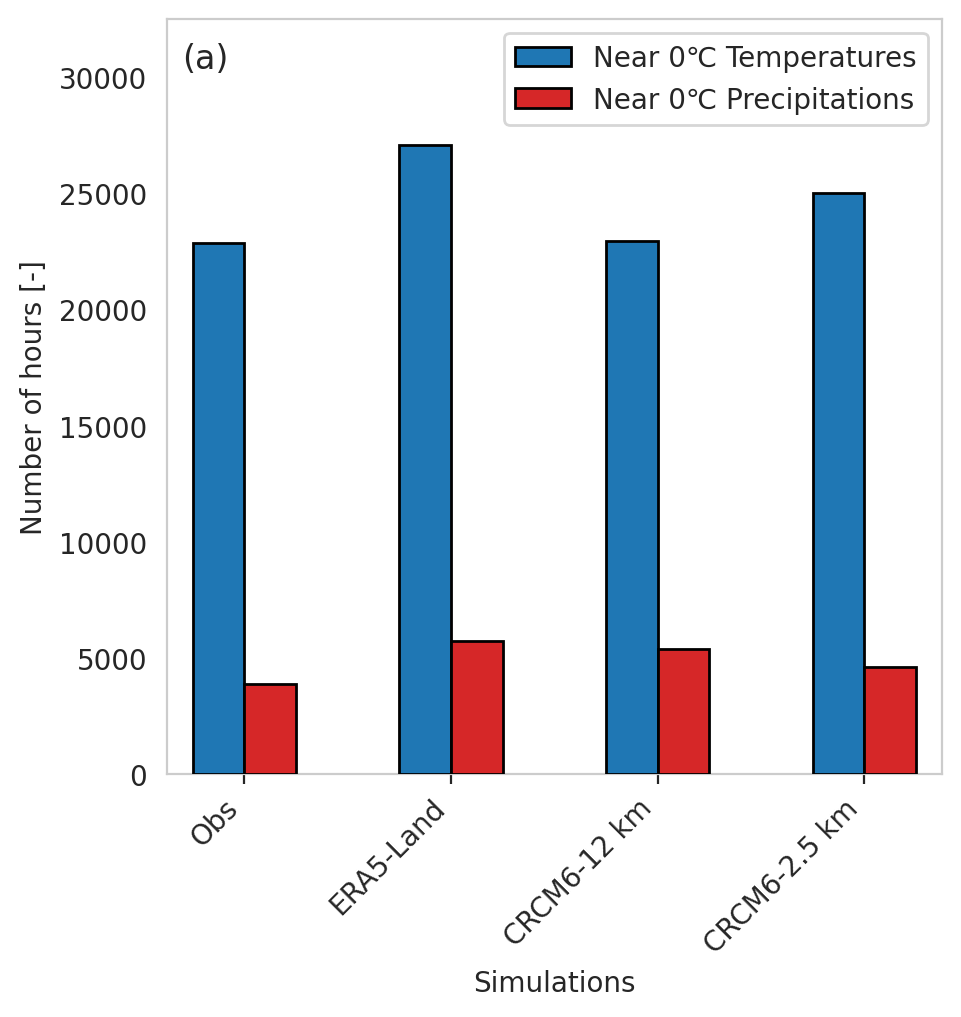

In [7]:
fig = plt.figure(facecolor='white', dpi=200, figsize=(5, 5))

spec = fig.add_gridspec(ncols=1, nrows=1)

# PR
ax = fig.add_subplot(spec[0, 0])
# ax11km = fig.add_subplot(spec[0, 0], projection=m)

bbox = {'boxstyle': "square", 'fc': "w"}
posi_text = (0.02, 0.97)
font = 12

list_xlabel = ['Obs','ERA5-Land','CRCM6-12 km','CRCM6-2.5 km']
width = 0.25
x = np.arange(len(list_xlabel))



ax.bar(x - width * 1 / 2, np.array(list_near0h), width=width, color='tab:blue', edgecolor='k', zorder=999,
       label='Near 0\u2103 Temperatures')
ax.bar(x + width * 1 / 2, np.array(list_near0prcph), width=width, color='tab:red', edgecolor='k', zorder=999,
       label='Near 0\u2103 Precipitations')
ax.hlines(0, x[0] - width * 3 / 2, x[-1] + width * 3 / 2, colors='lightgrey', linewidth=1)
ax.legend(loc='upper right')
# ax.plot(np.arange(x[0] -width*3/2,x[-1] +width*3/2),np.zeros(len(np.arange(x[0] -width*3/2,x[-1] +width*3/2))),c='k')
ax.set_xlim(x[0] - width * 3 / 2, x[-1] + width * 3 / 2)
# ax.bar(x + width, np.array(list_rmse_sim)[:, 2], width=width, color='tab:orange', edgecolor='k')
ytext = 2.1
# ax.text(x[0]-width*1/2, ytext, 'DAYMET', rotation=45, horizontalalignment='center', fontsize=8)
# ax.text(x[0]+width*1/2, ytext, 'ERA5-Land', rotation=45, horizontalalignment='center', fontsize=8)
# ax.text(x[0]+width, ytext, 'CaPA', rotation=45, horizontalalignment='center', fontsize=8)
ax.set_ylabel('Number of hours [-]')
# ax.set_xlabel('Simulations')
ax.tick_params(which="both", bottom=True, labelbottom=True)
# ax.set_xticks(x)
#ax.set_ylim(-2, 2)
#ax.set_ylim(-2.5,1.5)
ax.annotate('(a)', xy=posi_text, bbox=bbox, xycoords="axes fraction", ha='left', va='top', fontsize=font)

ax.set_xticks(x)
ax.set_xticklabels(list_xlabel, rotation=45, ha='right')
ax.set_xlabel('Simulations')
# ax.set_xticks(x)
ax.set_ylim(0,32500)
# ax.set_xticklabels(list_sim, rotation=0, ha='center')

ax.grid(False)



# ax.bar(x + width, np.array(list_rmse_sim)[:, 2], width=width, color='tab:orange', edgecolor='k')
ytext = 2.1
# ax1.text(x[0]-width*1/2, ytext, 'DAYMET', rotation=45, horizontalalignment='center', fontsize=8)
# ax1.text(x[0]+width*1/2, ytext, 'ERA5-Land', rotation=45, horizontalalignment='center', fontsize=8)
# ax.text(x[0]+width, ytext, 'CaPA', rotation=45, horizontalalignment='center', fontsize=8)

# phase title
# axobs.set_title('Obs', fontsize=10)

plt.subplots_adjust(hspace=0.2)
fig.savefig(
f'/upslope/chalifour/projet_maitrise/figure_final_submission/annual_bias_all_barTT_2year.png',
dpi = 150, format = 'png', bbox_inches = 'tight', )  # Most backends support png, pdf,
# fig.savefig(
#f'/upslope/chalifour/projet_maitrise/fig/comparaison_map_diff/diff_ref/annual_bias_all_barTT_2year.eps',
#dpi = 200, format = 'eps', bbox_inches = 'tight', )  # Most backends support png, pdf,
plt.show()

In [8]:
df_1h = pd.concat([dataframe_1h_obs_d,dataframe_1h_uqam_d,dataframe_1h_momo_d])
df_1h_1 = df_1h.loc['2020-10':'2021-04']
df_1h_2 = df_1h.loc['2021-10':'2022-04']
df_1h = pd.concat([df_1h_1,df_1h_2])

df_11kmP3 = pd.concat([dataframe_11kmP3_obs_d,dataframe_11kmP3uqam_d,dataframe_11kmP3momo_d])
df_11kmP3_1 = df_11kmP3.loc['2020-10':'2021-04']
df_11kmP3_2 = df_11kmP3.loc['2021-10':'2022-04']
df_11kmP3 = pd.concat([df_11kmP3_1,df_11kmP3_2])

df_2p5kmP3 = pd.concat([dataframe_2p5kmP3_obs_d,dataframe_2p5kmP3uqam_d,dataframe_2p5kmP3momo_d])
df_2p5kmP3_1 = df_2p5kmP3.loc['2020-10':'2021-04']
df_2p5kmP3_2 = df_2p5kmP3.loc['2021-10':'2022-04']
df_2p5kmP3 = pd.concat([df_2p5kmP3_1,df_2p5kmP3_2])

df_era5 = pd.concat([dataframe_era5_obs_d,dataframe_era5uqam_d,dataframe_era5momo_d])
df_era5_1 = df_era5.loc['2020-10':'2021-04']
df_era5_2 = df_era5.loc['2021-10':'2022-04']
df_era5 = pd.concat([df_era5_1,df_era5_2])

df_capa = pd.concat([dataframe_capa_obs_d,dataframe_capauqam_d,dataframe_capamomo_d])
df_capa_1 = df_capa.loc['2020-10':'2021-04']
df_capa_2 = df_capa.loc['2021-10':'2022-04']
df_capa = pd.concat([df_capa_1,df_capa_2])

df_daymet = pd.concat([dataframe_daymet_obs_d,dataframe_daymetuqam,dataframe_daymetmomo])
df_daymet_1 = df_daymet.loc['2020-10':'2021-04']
df_daymet_2 = df_daymet.loc['2021-10':'2022-04']
df_daymet = pd.concat([df_daymet_1,df_daymet_2])

# print(np.std(df_1h['PR']))
# print(np.std(df_11kmP3['PR']))
# print(np.std(df_2p5kmP3['PR']))

pr_obs = df_1h['PR'].values[~np.isnan(df_1h['PR'].values)]
# pr_obs_6h = df_6h.values[~np.isnan(df_6h.values)]
pr_11kmP3= df_11kmP3['PR'].values[~np.isnan(df_1h['PR'].values)]
pr_2p5kmP3 = df_2p5kmP3['PR'].values[~np.isnan(df_1h['PR'].values)]
pr_era5 = df_era5['PR'].values[~np.isnan(df_1h['PR'].values)]
# pr_obs = df_1h['PR']
# pr_11kmP3= df_11kmP3['PR']
# pr_2p5kmP3 = df_2p5kmP3['PR']
# pr_era5 = df_era5['PR']

# print(biais(pr_2p5kmP3,pr_obs))

MSE = np.square(np.subtract(pr_obs,pr_11kmP3)).mean()
RMSE_11km = math.sqrt(MSE)

# print(RMSE_11km)
MSE = np.square(np.subtract(pr_obs,pr_2p5kmP3)).mean()
RMSE_2p5km = math.sqrt(MSE)
# print(RMSE_2p5km)

pr_capa = df_capa['PR'].values[~np.isnan(df_1h['PR'].values)]
pr_day = df_daymet['PR'].values[~(np.isnan(df_daymet['PR'].values) | np.isnan(df_1h['PR'].values))]
pr_obs_daymet = df_1h['PR'].values[~(np.isnan(df_daymet['PR'].values) | np.isnan(df_1h['PR'].values))]


# pr_capa = df_capa['PR']
# pr_day = df_daymet['PR']
# pr_obs_daymet = df_1h['PR']


# print(np.corrcoef(pr_obs,pr_11kmP3))

print( f"12 km\ncor: {np.corrcoef(pr_obs,pr_11kmP3)[0, 1]:.2f}\nBiais: {biais(pr_11kmP3,pr_obs):.2f}\nRMSE: {RMSE_11km:.2f}\n")
print( f"2.5 km\ncor: {np.corrcoef(pr_obs,pr_2p5kmP3)[0, 1]:.2f}\nBiais: {biais(pr_2p5kmP3,pr_obs):.2f}\nRMSE: {RMSE_2p5km:.2f}\n")
MSE = np.square(np.subtract(pr_obs,pr_era5)).mean()
RMSE_era5 = math.sqrt(MSE)

MSE = np.square(np.subtract(pr_obs_daymet,pr_day)).mean()
RMSE_day = math.sqrt(MSE)
print( f"ERA 5 \ncor: {np.corrcoef(pr_obs,pr_era5)[0, 1]:.2f}\nBiais: {biais(pr_era5,pr_obs):.2f}\nRMSE: {RMSE_era5:.2f}\n")
print( f"Daymet \ncor: {np.corrcoef(pr_obs_daymet,pr_day)[0, 1]:.2f}\nBiais: {biais(pr_obs_daymet,pr_day):.2f}\nRMSE: {RMSE_day:.2f}\n")

MSE = np.square(np.subtract(pr_obs,pr_capa)).mean()
RMSE_capa = math.sqrt(MSE)
print( f"CaPA \ncor: {np.corrcoef(pr_obs,pr_capa)[0, 1]:.2f}\nBiais: {biais(pr_capa,pr_obs):.2f}\nRMSE: {RMSE_capa:.2f}\n")

# print( f"2.5 km cor: {np.corrcoef(pr_obs,pr_2p5kmP3)[0, 1]:.2f} ")

samples_pr = [[np.std(pr_11kmP3), np.corrcoef(pr_obs,pr_11kmP3)[0, 1], "12 km"],
           [np.std(pr_2p5kmP3), np.corrcoef(pr_obs,pr_2p5kmP3)[0, 1], "2.5 km"],
           [np.std(pr_era5),np.corrcoef(pr_obs,pr_era5)[0, 1], "ERA5-Land"],
           [np.std(pr_capa),np.corrcoef(pr_obs,pr_capa)[0, 1], "CaPA"],
           [np.std(pr_day),np.corrcoef(pr_obs_daymet,pr_day)[0, 1], "DAYMET"],]

# samples_pr = [[np.std(pr_11kmP3), np.corrcoef(pr_obs,pr_11kmP3)[0, 1], "12km"],
#            [np.std(pr_2p5kmP3), np.corrcoef(pr_obs,pr_2p5kmP3)[0, 1], "2.5km"],
#            [np.std(pr_era5),np.corrcoef(pr_obs,pr_era5)[0, 1], "ERA5-Land"],
#            [np.std(pr_day),np.corrcoef(pr_obs_daymet,pr_day)[0, 1], "DAYMET"],]

# list_namesim_pr = ["12 km","2.5 km","ERA5-Land","CaPA","DAYMET"]
# samples_pr = [[np.std(df_11kmP3['PR']), np.corrcoef(pr_obs,pr_11kmP3)[0, 1],biais(pr_11kmP3,pr_obs)],
#            [np.std(df_2p5kmP3['PR']), np.corrcoef(pr_obs,pr_2p5kmP3)[0, 1],biais(pr_2p5kmP3,pr_obs) ],
#            [np.std(df_era5['PR']),np.corrcoef(pr_obs,pr_era5)[0, 1],biais(pr_era5,pr_obs) ],
#            [np.std(df_capa['PR']),np.corrcoef(pr_obs,pr_capa)[0, 1],biais(pr_capa,pr_obs)],
#            [np.std(df_daymet['PR']),np.corrcoef(pr_obs_daymet,pr_day)[0, 1], biais(pr_day,pr_obs_daymet)],]

dict_var = {}

# samples = [[np.std(list_11kmP3), np.corrcoef(list_obs,list_11kmP3)[0, 1], "12 km"],
#            [np.std(list_2p5kmP3), np.corrcoef(list_obs,list_2p5kmP3)[0, 1], "2.5 km"],
#            [np.std(list_era5),np.corrcoef(list_obs,list_era5)[0, 1], "ERA5-Land"],
#            [np.std(list_capa),np.corrcoef(list_obs,list_capa)[0, 1], "CaPA"],
#            [np.std(list_daymet_obs),np.corrcoef(list_obs,list_daymet_obs)[0, 1], "DAYMET"],]


dict_var['PR'] = {'obs':pr_obs,'sample':samples_pr}

12 km
cor: 0.79
Biais: 0.13
RMSE: 3.43

2.5 km
cor: 0.74
Biais: -0.07
RMSE: 3.75

ERA 5 
cor: 0.87
Biais: 0.50
RMSE: 2.67

Daymet 
cor: 0.63
Biais: -0.57
RMSE: 4.53

CaPA 
cor: 0.62
Biais: 0.16
RMSE: 4.38


<ipython-input-8-064e0e920a29>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_1h_1 = df_1h.loc['2020-10':'2021-04']
<ipython-input-8-064e0e920a29>:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_11kmP3_1 = df_11kmP3.loc['2020-10':'2021-04']
<ipython-input-8-064e0e920a29>:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_2p5kmP3_1 = df_2p5kmP3.loc['2020-10':'2021-04']
<ipython-input-8-064e0e920a29>:17: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_era5_1 = df_era5.loc['2020-10':'2021-04']
<ipython-input-8-064e0e920a2

In [9]:
# TT

#mask_nearzero = ((df_1h['TT'].values >= -2) & (df_1h['TT'].values <= 2))[~np.isnan(df_1h['TT'].values)]
mask_prcp_obs = (df_1h['PR'].values >= 0.2)[~np.isnan(df_1h['TT'].values)]

tt_obs = df_1h['TT'].values[~np.isnan(df_1h['TT'].values)]

tt_11kmP3= df_11kmP3['TT'].values[~np.isnan(df_1h['TT'].values)]
tt_2p5kmP3 = df_2p5kmP3['TT'].values[~np.isnan(df_1h['TT'].values)]
tt_era5 = df_era5['TT'].values[~np.isnan(df_1h['TT'].values)]

tt_obs = np.ma.masked_array(data=tt_obs,mask=mask_prcp_obs, fill_value= np.nan)
tt_11kmP3 = np.ma.masked_array(data=tt_11kmP3,mask=mask_prcp_obs, fill_value= np.nan)
tt_2p5kmP3 = np.ma.masked_array(data=tt_2p5kmP3,mask=mask_prcp_obs, fill_value= np.nan)
tt_era5 = np.ma.masked_array(data=tt_era5,mask=mask_prcp_obs, fill_value= np.nan)

#mask_prcp_obs_day = (df_1h['PR'].values >= 0.2)[~(np.isnan(df_daymet['TT'].values) | np.isnan(df_1h['TT'].values))]

tt_day = df_daymet['TT'].values[~(np.isnan(df_daymet['TT'].values) | np.isnan(df_1h['TT'].values))]
# tt_day =  np.ma.masked_array(data=tt_day,mask=mask_prcp_obs_day, fill_value= np.nan)
tt_obs_daymet = df_1h['TT'].values[~(np.isnan(df_daymet['TT'].values) | np.isnan(df_1h['TT'].values))]
# tt_obs_daymet =  np.ma.masked_array(data=tt_obs_daymet,mask=mask_prcp_obs_day, fill_value= np.nan)

MSE = np.square(np.subtract(tt_obs,tt_11kmP3)).mean()
RMSE_11km = math.sqrt(MSE)


MSE = np.square(np.subtract(tt_obs,tt_2p5kmP3)).mean()
RMSE_2p5km = math.sqrt(MSE)

MSE = np.square(np.subtract(tt_obs,tt_era5)).mean()
RMSE_era5 = math.sqrt(MSE)

MSE = np.square(np.subtract(tt_obs_daymet,tt_day)).mean()
RMSE_day = math.sqrt(MSE)

print( f"12 km\ncor: {np.corrcoef(tt_obs,tt_11kmP3)[0, 1]:.2f}\nBiais: {biais(tt_11kmP3,tt_obs):.2f}\nRMSE: {RMSE_11km:.2f}\n")

print( f"2.5 km\ncor: {np.corrcoef(tt_obs,tt_2p5kmP3)[0, 1]:.2f}\nBiais: {biais(tt_2p5kmP3,tt_obs):.2f}\nRMSE: {RMSE_2p5km:.2f}\n")
print( f"ERA 5 \ncor: {np.corrcoef(tt_obs,tt_era5)[0, 1]:.2f}\nBiais: {biais(tt_era5,tt_obs):.2f}\nRMSE: {RMSE_era5:.2f}\n")
print( f"Daymet \ncor: {np.corrcoef(tt_obs_daymet,tt_day)[0, 1]:.2f}\nBiais: {biais(tt_obs_daymet,tt_day):.2f}\nRMSE: {RMSE_day:.2f}\n")

samples_tt = [[np.std(tt_11kmP3), np.corrcoef(tt_obs,tt_11kmP3)[0, 1], "12km"],
           [np.std(tt_2p5kmP3), np.corrcoef(tt_obs,tt_2p5kmP3)[0, 1], "2.5km"],
           [np.std(tt_era5),np.corrcoef(tt_obs,tt_era5)[0, 1], "ERA5-Land"],
           [np.std(tt_day),np.corrcoef(tt_obs_daymet,tt_day)[0, 1], "DAYMET"],]

dict_var['TT'] = {'obs':tt_obs,'sample':samples_tt}


# samples = [[np.std(list_11kmP3), np.corrcoef(list_obs,list_11kmP3)[0, 1], "12 km"],
#            [np.std(list_2p5kmP3), np.corrcoef(list_obs,list_2p5kmP3)[0, 1], "2.5 km"],
#            [np.std(list_era5),np.corrcoef(list_obs,list_era5)[0, 1], "ERA5-Land"],
#            [np.std(list_capa),np.corrcoef(list_obs,list_capa)[0, 1], "CaPA"],
#            [np.std(list_daymet_obs),np.corrcoef(list_obs,list_daymet_obs)[0, 1], "DAYMET"],]

12 km
cor: 0.95
Biais: -1.15
RMSE: 3.91

2.5 km
cor: 0.95
Biais: -0.34
RMSE: 3.42

ERA 5 
cor: 0.98
Biais: -1.67
RMSE: 3.77

Daymet 
cor: 0.94
Biais: -0.00
RMSE: 3.53


<ipython-input-10-0ebfccc98e47>:371: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.float(self.normfactor) > 0.01:


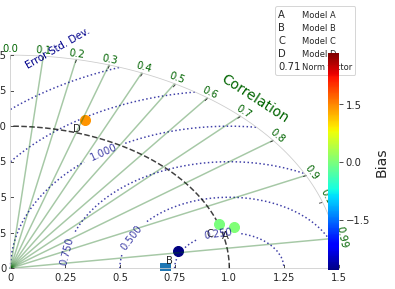

In [10]:
# -*- coding: utf-8 -*-
#
#****************************************************************************#
#                                                                            #
#  Copyright (c) 2015, by University of Birmingham. All rights reserved.     #
#                                                                            #
#  Redistribution and use in source and binary forms, with or without        #
#  modification, are permitted provided that the following conditions        #
#  are met:                                                                  #
#                                                                            #
#      * Redistributions of source code must retain the above copyright      #
#        notice, this list of conditions and the following disclaimer.       #
#      * Redistributions in binary form must reproduce the above copyright   #
#        notice, this list of conditions and the following disclaimer in the #
#        documentation and/or other materials provided with the distribution.#
#      * The name 'University of Birmingham' may not be used to endorse or   #
#        promote produces derived from this software without specific prior  #
#        written permission.                                                 #
#                                                                            #
#****************************************************************************#
#
"""
Modified Taylor diagram [Elvidge 2014, Taylor 2001] implementation code.

A set of classes and functions for constructiong a "modified Taylor diagram".
A diagram which plots the model standard deviation, correlation,
bias, error standard deviation and mean square error to observation data
with r=stddev and theta=arccos(correlation).

This code can be used for creating your own diagrams, and an example use
is shown at the bottom of the program. If you use this approach for model
comparison we ask that you reference:

Elvidge, S., M. J. Angling, and B. Nava (2014), On the Use of Modified Taylor
Diagrams to Compare Ionospheric Assimilation Models, Radio Sci.,
doi:10.1002/2014RS005435.

The orignal Taylor paper is:
Taylor, K. E. (2001), Summarizing multiple aspects of model performance in a
single diagram, J. Geophys. Res., 106(7), 7183–7192.

The format of use is (a more detailed example can be found at bottom of
the file):

>>> dia = ModifiedTaylorDiagram(refstd, label="Observation")
>>> colors = dia.calc_colors(bias_data)
>>> cbar = dia.add_colorbar(fig, bias_data.min(), bias_data.max())
>>> contours = dia.add_contours(colors='darkblue', levels=np.linspace(0,1.5,7))
>>> plt.clabel(contours, contours.levels[0:len(contours.levels)-2],
               inline=1, fontsize=10, use_clabeltext=1)
>>> plt.text(0.1, 0.9, 'Error Std. Dev.', transform=dia.ax.transAxes,
             rotation=30, color='darkblue', fontsize=10)
>>> for i,(stddev,corrcoef,bias) in enumerate(data):
        dia.add_point(stddev, corrcoef, mod_lab[i], marker='o', markersize=10.,
                      ls='', c=cm.jet(colors[i]), label=labels)
>>> legend = dia.add_legend(str_artist, labels, prop=dict(size='small'),
                            loc=(0.8,0.9))
>>> plt.show()

The code is split up in suich as way to give the user as much flexible in
presentation (color etc. ) as wanted.

Modification History
-------
Created on Mon Nov 01 2014 by Sean at SERENE, University of Birmingham
Contact: serene@contacts.bham.ac.uk

This code is an expansion of an original piece of work by Yannick Copin
(yannick.copin@laposte.net) created on 2012-02-17.

03/08/15  Added 'offset' variable to add_point, and 'fontsize' to add_colorbar
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


class ArtistObject(object):
    def __init__(self, text):
        self.my_text = text

class LegendHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        import matplotlib.colors as mpl_colors
        import matplotlib.text as mpl_text
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpl_text.Text(x=0, y=0, text=orig_handle.my_text,
                              verticalalignment=u'baseline',
                              horizontalalignment=u'left', multialignment=None,
                              fontproperties=None, rotation_mode=None)

        handlebox.add_artist(patch)
        return patch


class ModifiedTaylorDiagram(object):
    """
    Set up the modified Taylor diagram axes, i.e. single quadrant polar
    plot, using mpl_toolkits.axisartist.floating_axes.

    Parameters
    ----------
    datastd : float
        Standard deviation of the observation data set
    fig : figure object
        A figure where the diagram is to be plotted.
        The default is none, in which case a new figure is created.
    rect : int
        For creating subplots in the figure with the given grid definition.
        Default is 111, i.e. no subplot.
    normalize : string
        'Y' or 'N'. Determines whether the data should be normalized
        or not.
        Default is yes (Y).
    sd_axis_frac : float
        Scale of std. dev. axis (as a fraction of datastd)
        Default is 1.5
    fontsize : int
        Size of font for axis labels
        Default is 12
    """
    def __init__(self, datastd, fig=None, rect=111, normalize='Y',
                 sd_axis_frac=1.5, fontsize=10,label='observation'):
        #Impot the things we need
        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as fa
        import mpl_toolkits.axisartist.grid_finder as gf

        # Check if we are going to be normalizing values or not, and set
        # values appropriately.
        if normalize == 'Y':
            self.datastd = datastd / datastd
            self.normfactor = datastd
        else:
            self.datastd = datastd
            self.normfactor = 1

        # Standard deviation axis extent
        self.smin = 0
        self.smax = sd_axis_frac*self.datastd

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = np.concatenate((np.arange(10)/10.,[0.95,0.99]))
        tlocs = np.arccos(rlocs)        # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)    # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
        # Std. Dev. labels
        sdlocs = np.linspace(self.smin,self.smax,7)

        # Round the output (particularly import when normalize='N')
        sdlocs = [round(sd, -int(np.floor(np.log10(sd)))+2) for sd in sdlocs[1:]]
        sdlocs.append(0)

        gl2 = gf.FixedLocator(sdlocs)
        tf2 = gf.DictFormatter(dict(zip(sdlocs, map(str,sdlocs))))

        ghelper = fa.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi/2, # 1st quadrant
                                                     self.smin,self.smax),
                                           grid_locator1=gl1,
                                           grid_locator2=gl2,
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2
                                           )

        # Check if an existing figure has been passed to the program
        if fig is None:
            fig = plt.figure()

        ax = fa.FloatingSubplot(fig, rect, grid_helper=ghelper)

        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")  # Azimuthal axis
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].major_ticklabels.set_color("darkgreen")
        ax.axis["top"].label.set_color("darkgreen")
        ax.axis["top"].label.set_text("Correlation")
        ax.axis["top"].label.set_fontsize(fontsize)

        ax.axis["left"].set_axis_direction("bottom") # X axis
        ax.axis["left"].toggle(ticklabels=True)

        ax.axis["right"].set_axis_direction("top")   # Y axis
        ax.axis["right"].toggle(ticklabels=True, label=True)
        ax.axis["right"].major_ticklabels.set_axis_direction("left")
        if normalize == 'Y':
            ax.axis["right"].label.set_text("Normalised standard deviation")
        else:
            ax.axis["right"].label.set_text("Standard deviation")
        ax.axis["right"].label.set_fontsize(fontsize)

        ax.axis["bottom"].set_visible(False)         # Don't want it



        # Contours for each standard deviation
        ax.grid(False)

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and ref stddev contour
        l, = self.ax.plot([0], datastd, 'k',
                          ls='')

        p = self.ax.scatter([0], datastd, marker='s', s=100,label=label)

        t = np.linspace(0, np.pi/2)
        r = np.zeros_like(t) + self.datastd
        self.ax.plot(t,r, 'k--', label='_', alpha=0.75)

        # Collect data points for latter use (e.g. legend)
        self.samplePoints = [l,p]

        #Add "correlation lines"
        for i in np.concatenate((np.arange(1,10)/10.,[0.99])):
            self.ax.plot([np.arccos(i),np.arccos(i)], [0,self.smax],
                          c='darkgreen',alpha=0.35)


    def add_point(self, stddev, corrcoef, modlab, offset=(-12,-12),
                  *args, **kwargs):
        """
        Add point (stddev, corrcoeff) to the modified Taylor diagram.

        The "original" (non-normalized) values should be given to the function.
        If the "normalize" flag was passed when setting up the mTd then the
        values will be normalized in this function.

        Parameters
        ----------
        stddev : float
            The standard deviation of the point
        corrcoef : float
            The correlation coefficient of the data point to be plotted.
        modlab : string
            The name of the annonation for the point.
        offset : 2-tuple
            The text offset for the labels.
            Default is (-12,-12)
        *args *kwargs :
            Arguments and keyword arguments to pass to the plt.plot command.
            For example the label, for when constructing the legend later on.
        """
        # Normalize data if necessary
        stddev = stddev / self.normfactor

        # Plot the point.
        l, = self.ax.plot(np.arccos(corrcoef), stddev,
                          *args, **kwargs) # (theta,radius)
        self.samplePoints.append(l)

        # Label the point
        self.ax.annotate(modlab, xy = (np.arccos(corrcoef),stddev),
                         xytext = offset, textcoords = 'offset points')

        return l

    def add_contours(self, levels=6, **kwargs):
        """
        Add the error standard deviation contours.

        Parameters
        ----------
        levels : int
            The number of error std. dev. semi-circles to show.
        **kwargs :
            Keyword agruments accepted in plt.contour
        """

        rs,ts = np.meshgrid(np.linspace(self.smin,self.smax),
                            np.linspace(0,np.pi/2))
        # Compute error std dev
        rms = np.sqrt(self.datastd**2 + rs**2 - 2*self.datastd*rs*np.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, alpha=0.75,
                                   **kwargs)

        return contours

    def calc_colors(self, bias):
        """
        Calculate the colours for the symbols when plotting their bias.

        This should be the original values, not normalized values.

        Parameters
        ----------
        bias : array
            The bias values for the models, compared to the observation.
        """
        # Normalize the bias values if necessary
        bias = bias / self.normfactor

        # Set the values to the range [0,1] for colouring
        largest = np.array([abs(bias.min()),abs(bias.max())]).max()
        # Subtraction done, because color 0 = color 1
        bias_col = (bias + largest)/(2*largest) - 1e-10

        return bias_col

    def add_colorbar(self, bias, num_ticks=5, fontsize=10):
        """
        Add the colorbar to the diagram.

        Parameters
        ----------
        bias : array
            The (non-normalized) bias values for the models, compared to the
            observation.
        num_ticks : int
            The number of ticks for the color bar.
            Default is 5.
        fontsize : int
            The fontsize for the 'Bias' label.
            Default is 10.
        """
        import matplotlib.colors as mpl_colors
        from matplotlib import ticker

        # Normalize the bias values
        bias = bias / self.normfactor

#        largest = np.ceil(bias.max())
        largest = np.array([abs(bias.min()),abs(bias.max())]).max()
        cnorm = mpl_colors.Normalize(vmin=-largest,vmax=largest)

        tick_locator = ticker.MaxNLocator(nbins=num_ticks)

        # Plot the colorbar
        sm = plt.cm.ScalarMappable(norm=cnorm, cmap=cm.jet)
        # The array for ScalarMappable has to be faked :(
        sm._A=[]

        cbar = plt.colorbar(sm,orientation='vertical',fraction=0.042,pad=0.1)
        # Update the number of ticks
        cbar.locator = tick_locator
        cbar.update_ticks()

        # Remove colorbar container frame (just for style):
        cbar.outline.set_visible(False)

        # Label the colorbar
        cbar.set_label('Bias', fontsize=fontsize)


    def add_legend(self, artist, labels, *args, **kwargs):
        """
        Add the legend to the mTd.

        Python legends do not accept strings for the artist by default
        so a custom handler_map is required.

        Parameters
        ----------
        artist : string list
            The list of the annonations to be put in the legend.
        legend : string list
            The labels for the artist to put on the legend.
        """
        # Define new aritst objects
        obj = [ArtistObject(st) for st in artist]
        if self.normfactor != 1:
            if np.float(self.normfactor) > 0.01:
                obj.append(ArtistObject("{0:4.2f}".format(self.normfactor)))
                labels.append('Norm factor')
            else:
                obj.append(ArtistObject("{0:4.2e}".format(self.normfactor)))
                labels.append('         Norm factor')
        # Create a dictionary with the arists and the new handler_map
        dic = dict.fromkeys(obj, LegendHandler())

        # Add the legend
        self.ax.legend(obj, labels, handler_map = dic, *args, **kwargs)



test = True

if test:
    import string

    # "Fake" data/observation
    x = np.linspace(0,4*np.pi,100)
    data = np.sin(x)

    datastd = data.std(ddof=1)           # Observation standard deviation

    # Models
    m1 = data + 0.2*np.random.randn(len(x))          # Model A
    m2 = (0.8*data + .1*np.random.randn(len(x))) - 2 # Model B
    m3 = np.sin(x-np.pi/10)                          # Model C
    m4 = np.roll(data*1.1,10) + 1                    # Model D

    #Labels for the models
    model_label = list(string.ascii_uppercase)[0:4]

    # Compute stddev, correlation coefficient and bias of models
    points = np.array([ [m.std(ddof=1), np.corrcoef(data, m)[0,1],
                         m.mean()-data.mean()] for m in (m1,m2,m3,m4)])
    # points[:,0] is the std. dev.
    # points[:,1] is the correlation
    # points[:,2] is the bias

    # If you want to save the figure, I've found that passing
    # fig=plt.figure(figsize(5.5,3.5)) to the ModifiedTaylorDiagram class
    # gives you a nice result.

    # Set up the mTd
    dia = ModifiedTaylorDiagram(datastd, normalize='Y', fontsize=14)

    #Calcuate the colours for the points on the diagram, by passing the bias

    colors = dia.calc_colors(points[:,2])

    # Add colorbar to the diagram
    cbar = dia.add_colorbar(points[:,2], fontsize=14)

    # Add the error std. dev. contours, and label them
    contours = dia.add_contours(colors='darkblue',levels=np.linspace(0,1.5,7),
                                linestyles='dotted')
    plt.clabel(contours, contours.levels[0:len(contours.levels)-2],
               inline=1, use_clabeltext=1)
    plt.text(0.05, 0.93, 'Error Std. Dev.', transform=dia.ax.transAxes,
             rotation=30, color='darkblue')

    # Add points to modified Taylor diagram
    for i,(stddev,corrcoef,bias) in enumerate(points):
        dia.add_point(stddev, corrcoef, model_label[i], marker='o',
                      markersize=10., c=cm.jet(colors[i]),
                      label="Model %s" % list(string.ascii_uppercase)[i])

    # Add a legend to the diagram
    dia.add_legend(model_label, ["Model %s"
                   % list(string.ascii_uppercase)[i] for i,j in
                   enumerate(model_label)], prop=dict(size='small'),
                   loc=(0.8,0.9))

    # plt.savefig('C:\\Users\\Sean\\Google Drive\\Desktop\\fig02.png', dpi=600, facecolor='w',
    #         edgecolor='w')
    plt.show()

In [11]:

#!/usr/bin/env python
# Copyright: This document has been placed in the public domain.

"""
Taylor diagram (Taylor, 2001) implementation.
Note: If you have found these software useful for your research, I would
appreciate an acknowledgment.
"""

__version__ = "Time-stamp: <2018-12-06 11:43:41 ycopin>"
__author__ = "Yannick Copin <yannick.copin@laposte.net>"

import numpy as NP
import matplotlib.pyplot as PLT


class TaylorDiagram(object):
    """
    Taylor diagram.
    Plot model standard deviation and correlation to reference (data)
    sample in a single-quadrant polar plot, with r=stddev and
    theta=arccos(correlation).
    """

    def __init__(self, refstd,
                 fig=None, rect=111, label='_', srange=(0, 1.5), extend=False):
        """
        Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using `mpl_toolkits.axisartist.floating_axes`.
        Parameters:
        * refstd: reference standard deviation to be compared to
        * fig: input Figure or None
        * rect: subplot definition
        * label: reference label
        * srange: stddev axis extension, in units of *refstd*
        * extend: extend diagram to negative correlations
        """

        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd            # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = NP.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])
        if extend:
            # Diagram extended to negative correlations
            self.tmax = NP.pi
            rlocs = NP.concatenate((-rlocs[:0:-1], rlocs))
        else:
            # Diagram limited to positive correlations
            self.tmax = NP.pi/2
        tlocs = NP.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent (in units of reference stddev)
        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = PLT.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
        ax.axis["left"].label.set_text("Standard deviation")

        ax.axis["right"].set_axis_direction("top")    # "Y-axis"
        ax.axis["right"].toggle(ticklabels=True, label=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        ax.axis["right"].label.set_text("Standard deviation")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)          # Unused

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and stddev contour
        l, = self.ax.plot([0], self.refstd, 'k',
                          ls='')
        p = self.ax.scatter([0], self.refstd, marker='s', s=100, label=label,zorder=999)
        t = NP.linspace(0, self.tmax)
        r = NP.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l,p]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """
        Add sample (*stddev*, *corrcoeff*) to the Taylor
        diagram. *args* and *kwargs* are directly propagated to the
        `Figure.plot` command.
        """

        l, = self.ax.plot(NP.arccos(corrcoef), stddev,
                          *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)

        return l

    def add_grid(self, *args, **kwargs):
        """Add a grid."""

        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        """
        Add constant centered RMS difference contours, defined by *levels*.
        """

        rs, ts = NP.meshgrid(NP.linspace(self.smin, self.smax),
                             NP.linspace(0, self.tmax))
        # Compute centered RMS difference
        rms = NP.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*NP.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours


def test1():
    """Display a Taylor diagram in a separate axis."""

    # Reference dataset
    x = NP.linspace(0, 4*NP.pi, 100)
    data = NP.sin(x)
    refstd = data.std(ddof=1)           # Reference standard deviation

    # Generate models
    m1 = data + 0.2*NP.random.randn(len(x))     # Model 1
    m2 = 0.8*data + .1*NP.random.randn(len(x))  # Model 2
    m3 = NP.sin(x-NP.pi/10)                     # Model 3

    # Compute stddev and correlation coefficient of models
    samples = NP.array([ [m.std(ddof=1), NP.corrcoef(data, m)[0, 1]]
                         for m in (m1, m2, m3)])

    fig = PLT.figure(figsize=(10, 4))

    ax1 = fig.add_subplot(1, 2, 1, xlabel='X', ylabel='Y')
    # Taylor diagram
    dia = TaylorDiagram(refstd, fig=fig, rect=122, label="Reference",
                        srange=(0.5, 1.5))

    colors = PLT.matplotlib.cm.jet(NP.linspace(0, 1, len(samples)))

    ax1.plot(x, data, 'ko', label='Data')
    for i, m in enumerate([m1, m2, m3]):
        ax1.plot(x, m, c=colors[i], label='Model %d' % (i+1))
    ax1.legend(numpoints=1, prop=dict(size='small'), loc='best')

    # Add the models to Taylor diagram
    for i, (stddev, corrcoef) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc=colors[i], mec=colors[i],
                       label="Model %d" % (i+1))

    # Add grid
    dia.add_grid()

    # Add RMS contours, and label them
    contours = dia.add_contours(colors='0.5')
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.2f')

    # Add a figure legend
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right')

    return dia


def test2():
    """
    Climatology-oriented example (after iteration w/ Michael A. Rawlins).
    """

    # Reference std
    stdref = 48.491

    # Samples std,rho,name
    samples = [[25.939, 0.385, "Model A"],
               [29.593, 0.509, "Model B"],
               [33.125, 0.585, "Model C"],
               [29.593, 0.509, "Model D"],
               [71.215, 0.473, "Model E"],
               [27.062, 0.360, "Model F"],
               [38.449, 0.342, "Model G"],
               [35.807, 0.609, "Model H"],
               [17.831, 0.360, "Model I"]]

    fig = PLT.figure()

    dia = TaylorDiagram(stdref, fig=fig, label='Reference', extend=False)
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

    # Add models to Taylor diagram
    for i, (stddev, corrcoef, name) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc='k', mec='k',
                       label=name)

    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.0f')

    dia.add_grid()                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward

    # Add a figure legend and title
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right')
    # fig.suptitle("Taylor diagram", size='x-large')  # Figure title

    return dia




# dia = test1()
# dia = test2()

# PLT.show()

<ipython-input-12-b6f1f99e656e>:58: UserWarning: The handle <matplotlib.lines.Line2D object at 0x14b6113109d0> has a label of '_line0' which cannot be automatically added to the legend.
  ax1.legend(dia.samplePoints,label,


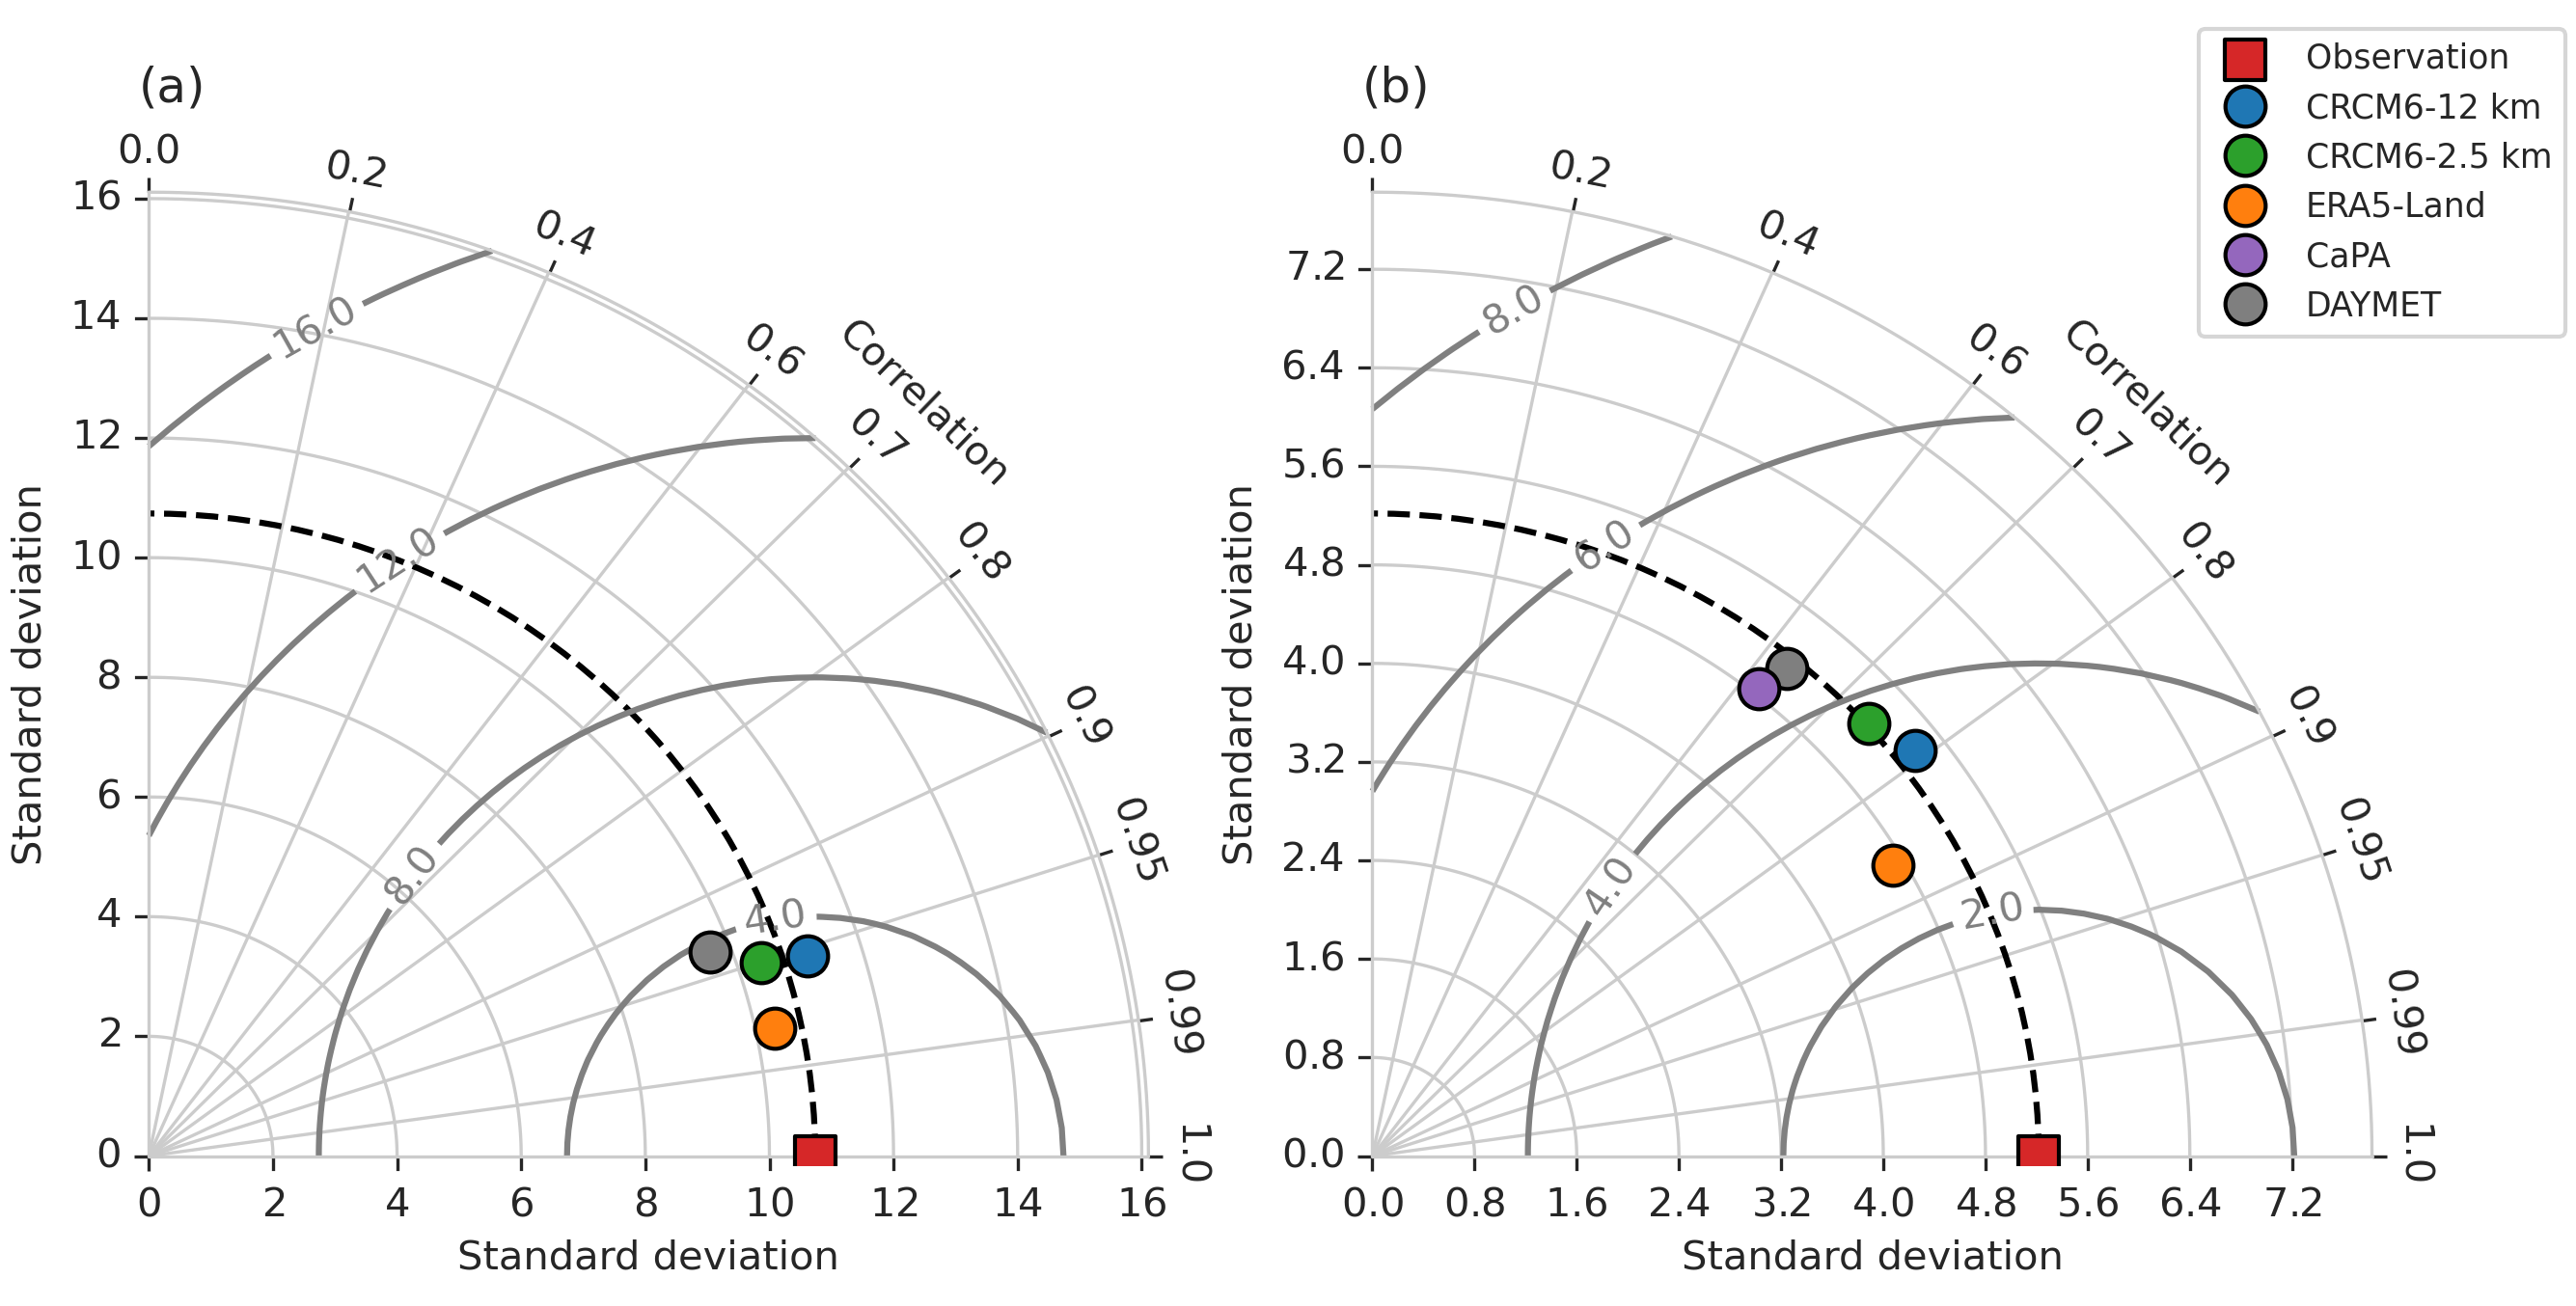

In [12]:


# Reference std


# Samples std,rho,name


fig = plt.figure(figsize=(10, 4.5),dpi=300,facecolor='white')
ax1 = 0
title= ['(a)','(b)']
dict_phase_prcp = {'TT':'2-m air Temperature','PR':'Precipitation accumualtion'}
for idx,var in enumerate(['TT','PR',]):

    stdref = np.std(dict_var[var]['obs'])
    rect_list = [121,122]
    #
    dia = TaylorDiagram(stdref, fig=fig,rect=rect_list[idx], label='Observation',extend=False,srange=(0, 1.5) )
    dia.samplePoints[1].set_facecolor('tab:red')  # Mark reference point as a red star

    dia.samplePoints[1].set_edgecolor('k')

    # colors = dia.calc_colors(np.array(dict_var[var]['sample'])[:,2])
    # cbar = dia.add_colorbar(np.array(dict_var[var]['sample'])[:,2], fontsize=14)

    # Add models to Taylor diagram

    if var == 'TT':
        list_colors = ['tab:blue','tab:green','tab:orange','tab:grey']
    else :
        list_colors = ['tab:blue','tab:green','tab:orange','tab:purple','tab:grey']
        # list_colors = ['tab:blue','tab:green','tab:orange','tab:grey']
    for i, (stddev, corrcoef, name) in enumerate(dict_var[var]['sample']):
        dia.add_sample(stddev, corrcoef,
                       marker='o', ms=10, ls='',
                       mfc=list_colors[i], mec='k',
                       label=name,zorder = 9999)


    # for i,(stddev,corrcoef,bias) in enumerate(dict_var[var]['sample']):
    #     dia.add_point(stddev, corrcoef,list_namesim_pr[i], marker='o',
    #                   markersize=10.,mec='k',ls='', c=cm.jet(colors[i]),
    #                   label=list_namesim_pr[i])


    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
    plt.clabel(contours, inline=1, fontsize=10, fmt='%.1f')

    dia.add_grid(True)                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward
    bbox = {'boxstyle':"square", 'fc':"w"}
    dia._ax.set_title(f'{title[idx]}',loc='left',pad = 20,bbox=bbox)

    if var =='PR':
        ax1 = dia._ax
label = [ p.get_label() for p in dia.samplePoints ]
label[2]= 'CRCM6-'+label[2]
label[3]= 'CRCM6-'+label[3]
ax1.legend(dia.samplePoints,label,
           numpoints=1, prop=dict(size='small'), loc='center',bbox_to_anchor=(1, 1))

# Add a figure legend and title
# fig.legend(dia.samplePoints,
#            [ p.get_label() for p in dia.samplePoints ],
#            numpoints=1, prop=dict(size='small'), loc='upper right')
# fig.suptitle("Taylor diagram", size='x-large')  # Figure title

# fig.tight_layout()

image_output_dpi = 200


fig.savefig(
        f'/upslope/chalifour/projet_maitrise/figure_final_submission/taylor_diagram_spatial.png',
        dpi=image_output_dpi, format='png', bbox_inches='tight', )  # Most backends support png, pdf,
# fig.savefig(
#         f'/upslope/chalifour/projet_maitrise/fig/taylo_diag/PRTT_{begin_t[0:4]}_{end_t[0:4]}_spatial.eps',
#         dpi=image_output_dpi, format='eps', bbox_inches='tight', )  # Most backends support png, pdf,


# fig.savefig(
#         f'/upslope/chalifour/projet_maitrise/fig/taylo_diag/PRTT_{begin_t[0:4]}_{end_t[0:4]}.png',
#         dpi=image_output_dpi, format='png', bbox_inches='tight', )  # Most backends support png, pdf,
# fig.savefig(
#         f'/upslope/chalifour/projet_maitrise/fig/taylo_diag/PRTT_{begin_t[0:4]}_{end_t[0:4]}.eps',
#         dpi=image_output_dpi, format='eps', bbox_inches='tight', )  # Most backends support png, pdf,